# IBM Python

## Module 4  Model Development

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

** Key points: Linear regression and Multiple linear regression, Evaluation via visualization**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path of data 
path = 'https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 1. Linear regression and Multiple linear regression

### Linear Regression

**Linear function:**
\begin{equation*}
Yhat = a + b  X
\end{equation*}


In [4]:
# Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [5]:
# Create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Use Highway-mpg to help us predict car price
X = df[['highway-mpg']]
Y = df['price']

In [11]:
# Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# See our prediction
Yh = lm.predict(X)
Yh[0:5]

array([ 16236.50464347,  16236.50464347,  17058.23802179,  13771.3045085 ,
        20345.17153508])

In [14]:
# check value of a(intercept) and b(slope)
lm.intercept_

38423.305858157386

In [16]:
lm.coef_

array([-821.73337832])

Thus, our linear model can be written as:

   **price** = 38423.31 - 821.73 x  **highway-mpg**

In [17]:
# train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?
lm1 = LinearRegression()
X1 = df[['engine-size']]
lm1.fit(X1,Y)
Yh1 = lm1.predict(X1)
Yh1[0:5]

array([ 13728.4631336 ,  13728.4631336 ,  17399.38347881,  10224.40280408,
        14729.62322775])

In [21]:
# check value of a and b
a1=lm1.intercept_   #a
b1=lm1.coef_        #b
print a1,b1

-7963.33890628 [ 166.86001569]


Thus, the equation can be written as:
    
   ** price = -7963.34 + 166.86 x engine-size **

### Multiple linear regression

 \begin{equation*}
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
\end{equation*}



In [22]:
# Let's develop a model using multiple variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [23]:
# Fit the linear model using the four above-mentioned variables.
lm.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# check a and b
a = lm.intercept_
b = lm.coef_
print a,b

-15806.6246263 [ 53.49574423   4.70770099  81.53026382  36.05748882]


Thus, our multiple linear model is:
    
   **Price** = -15806.6246263 + 53.49574423 x **horsepower** + 4.70770099  x **curb-weight** + 81.53026382 x **engine-size** + 36.05748882 x **highway-mpg**

In [26]:
# try another variables
lm2=LinearRegression()
Z2 = df[['normalized-losses','highway-mpg']]
lm2.fit(Z2,df['price'])
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# check a and b
a2 = lm2.intercept_
b2 = lm2.coef_
print a2,b2

38201.3132725 [   1.49789586 -820.45434016]


### 2. Model evaluation using visualization

In [28]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression plot

(0, 50000.0)

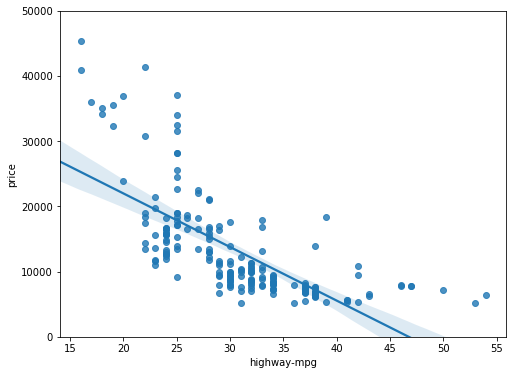

In [32]:
# set plot size 
width = 8
height = 6   
plt.figure(figsize=(width,height))

# set regression variables, retrive data and plot
sns.regplot(x='highway-mpg', y='price', data=df)

# set y-axis range
plt.ylim(0,50000.)

Price is negatively correlated with highway-mpg. The points are mildly scattered around the regression line, most scattered points are found over the low and high ranges of highway-mpg. This suggests that the linear model is not bad.

(0, 50000.0)

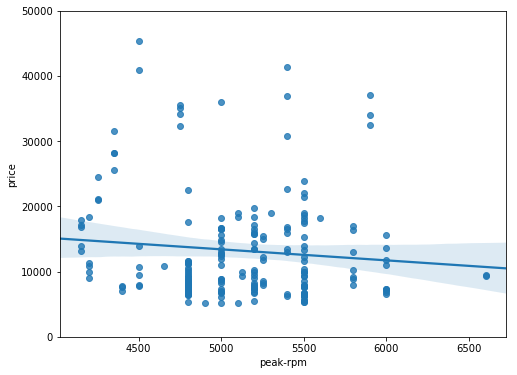

In [33]:
# compare with 'peak-rpm'
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,50000.)

Price is weakly negatively correlated with peak-rpm, the points are pretty scattered for all values of the predictor in this case. This suggest the linear model is not a good estimate.

In [34]:
# Use the method ".corr()" to verify
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Correlation table verified the results of regression plots. 'Highway-mpg' has strong negative relationship with price, whereas 'peak-rpm' does not have significant correlation with price.

### Residual plot

A good way to visualize the variance of the data is to use a residual plot. The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e).

- If the points in a residual plot are **randomly spread out around the x-axis**, then a **linear model is appropriate** for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.
- Use **.residplot** in seaborn

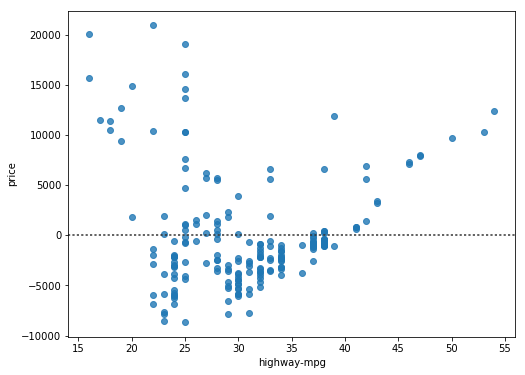

In [35]:
# generate residual plot
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a **non-linear model** is more appropriate for this data.

### Visualizing Multiple linear regression 

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

- Use **.distplot** 

In [36]:
# Multiple linear model prediction
Yhm = lm.predict(Z)

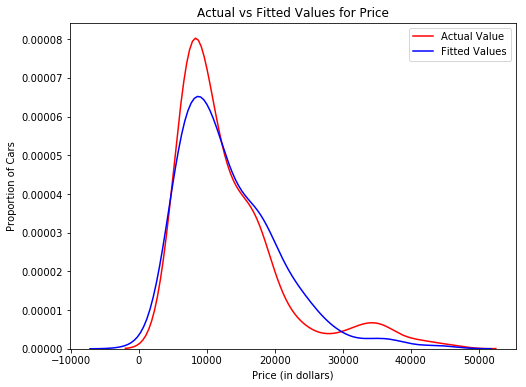

In [40]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")   # for original value
sns.distplot(Yhm, hist=False, color="b", label="Fitted Values" , ax=ax1)      # for predicted value 


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## 3. Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

 \begin{equation*}
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
\end{equation*}

In [45]:
# define a function for plotting
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Highway-mpg')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")

done


In [46]:
# prepare the variables
x = df['highway-mpg']
y = df['price']
print("done")

done


In [47]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
f = np.polyfit(x,y,3)   # 3rd order polynomial 
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


C:\Users\DI\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


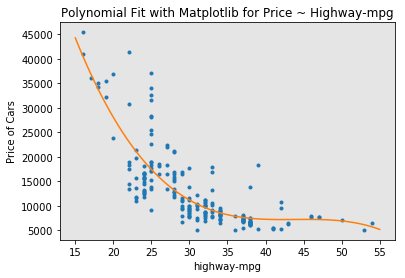

In [48]:
# plotting
PlotPolly(p,x,y,'highway-mpg')

In [49]:
# check the coefficients
np.polyfit(x, y, 3)

array([ -1.55663829e+00,   2.04754306e+02,  -8.96543312e+03,
         1.37923594e+05])

This polynomial model performs better than the linear model.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


C:\Users\DI\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


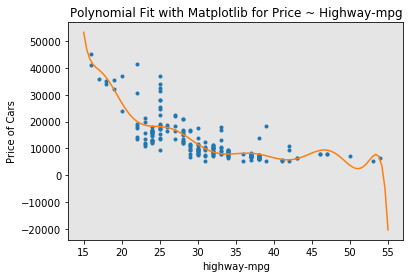

In [50]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

#### Multivariate polynomial 

Analytical expression for multivariate polynomial

\begin{equation*}
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}

Use **PolynomialFeatures** from Scikit Learn

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
# create a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [53]:
# most perform transformation on predictors to
Z_pr=pr.fit_transform(Z)

In [54]:
Z.shape

(201, 4)

In [55]:
Z_pr.shape

(201L, 15L)

15 features after transfomation

### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
# creating pipeline list
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [69]:
# input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [70]:
# Normalize the data, perform a transform and fit the model simultaneously by using pipeline
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [71]:
# check the prediction
ypipe=pipe.predict(Z)
ypipe[0:4]

array([ 13102.74784201,  13102.74784201,  18225.54572197,  10390.29636555])

In [65]:
#Create a pipeline that Standardizes the data, then perform prediction using a linear regression model 
#using the features Z and targets y
# Linear Reg, no Polynomial
Input1=[('scale',StandardScaler()),('model',LinearRegression())]

pipe1=Pipeline(Input)

pipe1.fit(Z,y)

ypipe1=pipe1.predict(Z)
ypipe1[0:4]

array([ 13699.11161184,  13699.11161184,  19051.65470233,  10620.36193015])

### 4. Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.



**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

For simple linear model

In [72]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.49659118843391747

In [73]:
# calculate MSE
Yh = lm.predict(X)   # get prediction

In [74]:
# import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

In [77]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yh)

31635042.944639895

For multiple linear model

In [78]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.80935628065774567

In [79]:
Yhm = lm.predict(Z)
mean_squared_error(df['price'], Yhm)

11980366.87072649

For polynomial fit model

In [80]:
# let’s import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [81]:
r2 = r2_score(y,p(x))
r2

0.67419466639065129

In [82]:
mean_squared_error(df['price'], p(x))

20474146.426361252

### Prediction and decision making

**Now that we have trained our models, let's make prediction**

In [83]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [84]:
# generate input values
new_input=np.arange(1,100,1).reshape(-1,1)

In [85]:
# train model
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
# prediction
Yhp = lm.predict(new_input)
Yhp[0:5]

array([ 37601.57247984,  36779.83910151,  35958.10572319,  35136.37234487,
        34314.63896655])

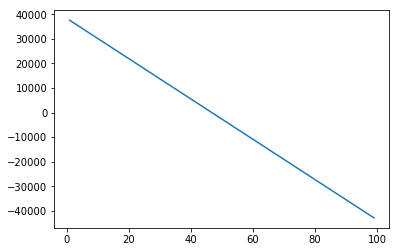

In [89]:
# Visualize our prediction
plt.plot(new_input,Yhp)
plt.show()

**Decision Making: Determining a Good Model Fit**

Some criteria:
    
- The model with the higher R-squared value is a better fit

- The model with the smallest MSE value is a better fit 

#### Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

**Conclusion**

Comparing these three models, we conclude that the **MLR model** is the best model to be able to predict price from our dataset. 

**Next**

Let's see whether multivariate polynomial fit is better than MLR model!